[[1170  431]
 [ 134  265]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1601
           1       0.38      0.66      0.48       399

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.72      0.74      2000



C:\Users\marco\AppData\Local\Temp\ipykernel_15328\1593054121.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdf = df.groupby(['agegroup'])[['churn']].aggregate({'churn':[np.size]}).reset_index()
C:\Users\marco\AppData\Local\Temp\ipykernel_15328\1593054121.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdf = df.groupby(['agegroup'])[['churn']].aggregate({'churn':[np.size]}).reset_index()


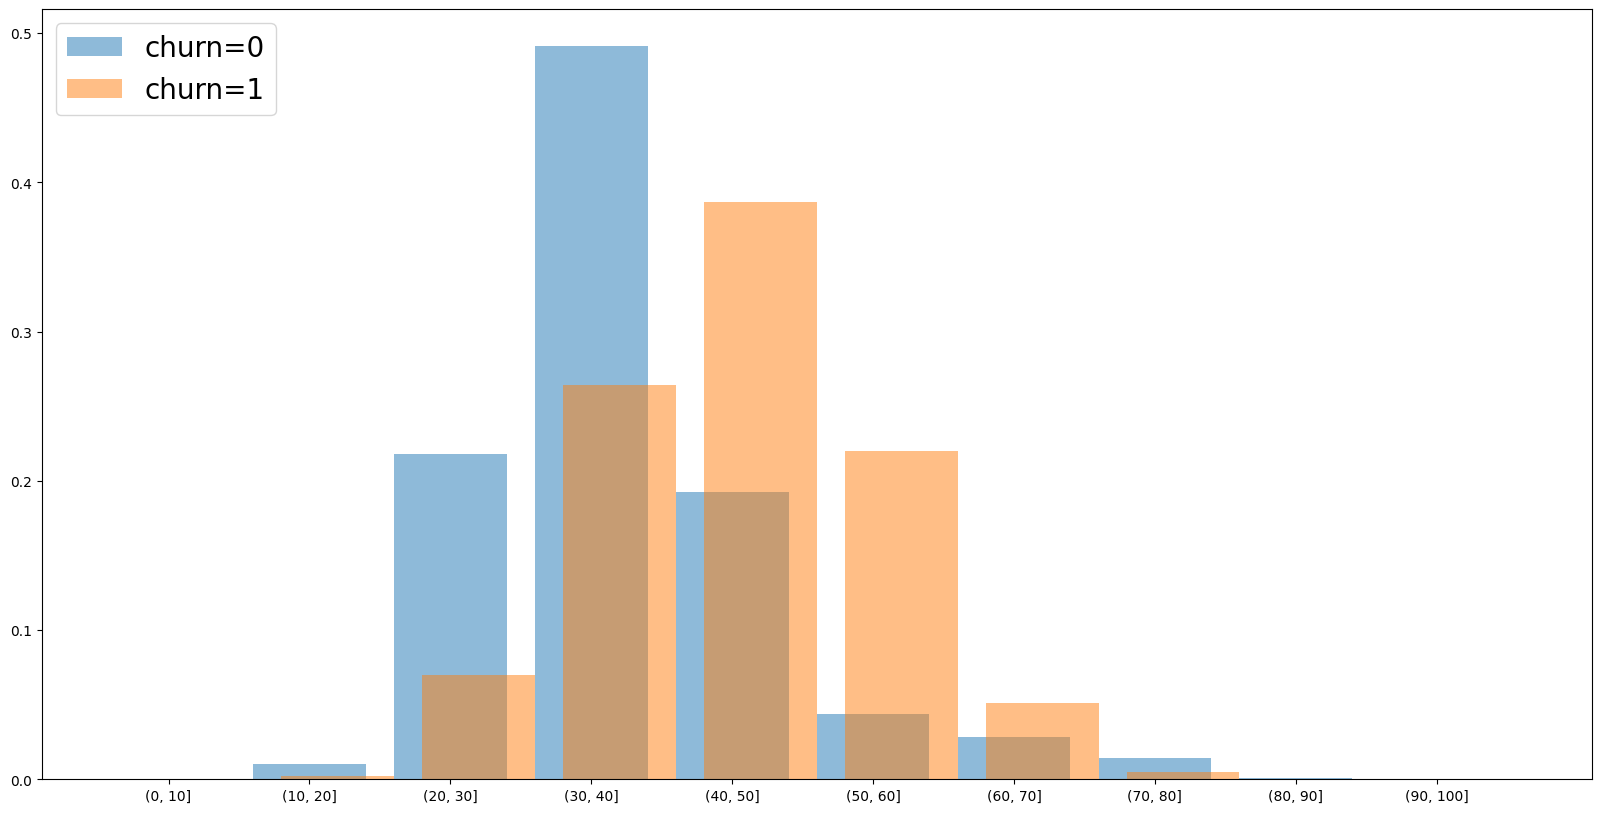

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Bank Customer Churn Prediction.csv')
#df.dtypes
one_hot_country = pd.get_dummies(df.country, prefix='country')
one_hot_gender = pd.get_dummies(df.gender, prefix='gender')
df = df.drop(["country","gender"],axis=1)
df = pd.concat([df, one_hot_country, one_hot_gender], axis=1)

df = df.drop(['customer_id'], axis='columns')
X = df.drop(['churn'], axis='columns')
y = df['churn']
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

clf.coef_
# come varia la distribuzuinone delle classi sulla base dell'eta?


def get_agebin(df):
    df['agegroup'] = pd.cut(df['age'], range(0,110,10))
    gdf = df.groupby(['agegroup'])[['churn']].aggregate({'churn':[np.size]}).reset_index()
    gdf.columns = ['agegroup','size']
    gdf['size'] = gdf['size'] / gdf['size'].sum()
    return gdf

df0 = df.loc[df['churn']==0,:]
df1 = df.loc[df['churn']==1,:]
gdf0 = get_agebin(df0.copy())
gdf1 = get_agebin(df1.copy())
x0 = [i for i in range(gdf0.shape[0])]
x1 = [i+0.2 for i in range(gdf1.shape[0])]
plt.figure(figsize=(20,10))
plt.bar(x0,gdf0['size'], alpha=0.5, label='churn=0')
plt.bar(x1,gdf1['size'], alpha=0.5, label='churn=1')
plt.xticks(x0, gdf0['agegroup'].astype('str'))
plt.legend(loc='upper left', prop = { "size": 20 })
plt.show()


